<a href="https://colab.research.google.com/github/44REAM/CEB-machine-learning/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive bayes

modified from Aj Ratchainant slide

## Theory

### Conditional probability

<p align="center">
<img src="https://github.com/44REAM/CEB-machine-learning/blob/main/images/set.png?raw=1" width="300" />
</p>

$$
P(X|Y) = \frac{P(X \cap Y)}{P(Y)} \to \frac{P(X, Y)}{P(Y)}
$$

$$
P(Y|X) = \frac{P(X \cap Y)}{P(X)} \to \frac{P(X, Y)}{P(X)}
$$


Term:
- joint probability
- marginal probability
- conditional probability

---

### Bayes Theorem
Let $A$, $B$ a random variable 

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

for

$P(A|B)$ = Posterior, $P(B|A)$ = Likelihood, $P(A)$ = Prior, $P(B)$ = Marginal

---

**Example**

*Historical data tells that 10% of
patients visiting our clinic have liver
disease. 7% of patients diagnosed
with liver disease, they are
alcoholics. 5% of patients according
to the test are alcoholics. Finding
out the probability of liver disease if
a given patient is alcoholics.*

**Prior**: Historical data tells that 10% of patients visiting our clinic
have liver disease, $P(\text{liver disease}) = 0.1$

**Likelihood**: 7% of patients diagnosed with liver disease, they
are alcoholics, $P(\text{alcoholics} | \text{liver disease}) = 0.07$

**Marginal**: 5% of patients according to the test are alcoholics,
$P(\text{alcoholics})$ = 0.05

**Posterior**: $P(\text{liver disease | alcoholics)}) = (0.07 × 0.1)/0.05 = 0.1$

---


### Conditional independent

Let $A$, $B$ a random variable 

**Definition**: Event $A$ and $B$ are independent if and only if 
$$P(A,B) = P(A)P(B)$$

And if 
$$P(A|B) = P(A)$$

---

if $P(C) > 0$

**Definition**: Two events $A$ and $B$ are conditionally independent given event $C$ with $P(C) > 0$ if and only if

$$P(A,B|C) = P(A|C)P(B|C)$$

if $P(B)>0$ we also get

$$P(A|B,C) = P(A|C)$$

**Translation**: Knowing information on event $B$ dose not improve our knowledge on $A$ given information $C$

---

**Example**:  

1. Lung Cancer prediction from smoking and sex

Knowing prior probability of sex does not improve
posterior probability of lung cancer given smoking

2. Rain prediction from a lot of cloud and low light

Knowing prior probability of low light dose not improve posterior probability of raining since we had been given an information of lot of cloud



### Naive bayes model

<p align="center">
<img src="https://github.com/44REAM/CEB-machine-learning/blob/main/images/network.png?raw=1" width="300" />
</p>

---

- Let $Y = \{y_1, y_2, ..., y_k\}$ be a set of class labels
- Let $X_j$ be the $j$ random variable for $j \in \{1,2,... m\}$ and $x_j$ is the value of $X_j$

For each class label $i \in \{1,2,...k\}$ Naive bayes model is defined as the follows

$$P(y_i | x_1, x_2, ...,x_m) = \frac{P(y_i) P(x_1, x_2, ...,x_m|y_i)}{P(x_1, x_2, ...,x_m)}$$

The naive bayes model assume $X_j$ and $X_g$ are independent given Y for $j,g \in \{1,2,... m\}$, we got.

$$P(y_i | x_1, x_2, ...,x_m) = \frac{P(y_i)}{P(x_1, x_2, ..., x_m)}\prod^m_{j=1} P(x_j|y_i)$$

$$\overbrace{P(y_i | x_1, x_2, ...,x_m)}^{\text{Posterior}} \underbrace{\propto P(y_i)}_{\text{Prior}}\overbrace{\prod^m_{j=1} P(x_j|y_i)}^\text{Likelihood}$$

---

**MLE Inference**

$$\hat{y}_i = \text{argmax}_{y_i \in Y} \prod^m_{j=1} P(x_j|y_i)$$
$$\hat{y}_i = \text{argmax}_{y_i \in Y} \sum^m_{j=1} \text{log} P(x_j|y_i)$$

**MAP Inference**

$$\hat{y}_i = \text{argmax}_{y_i \in Y} P(y_i) \prod^m_{j=1} P(x_j|y_i)$$
$$\hat{y}_i = \text{argmax}_{y_i \in Y} \text{log}P(y_i) + \sum^m_{j=1} \text{log} P(x_j|y_i)$$

---


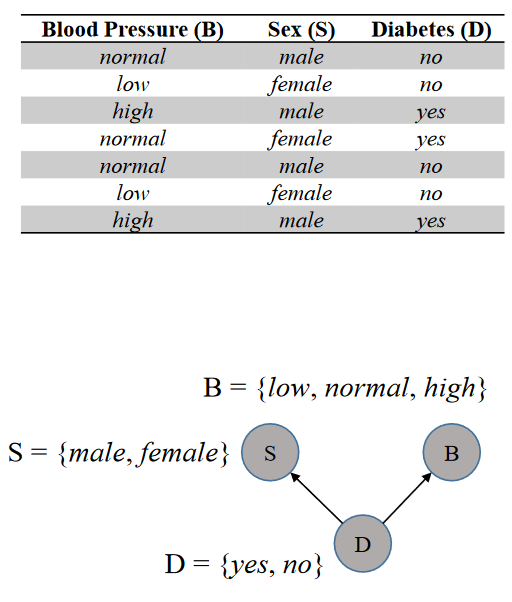

### Example

Model parameters are

- $P(S|D)$
- $P(B|D)$
- $P(D)$

**Step 1: Create frequency tables**

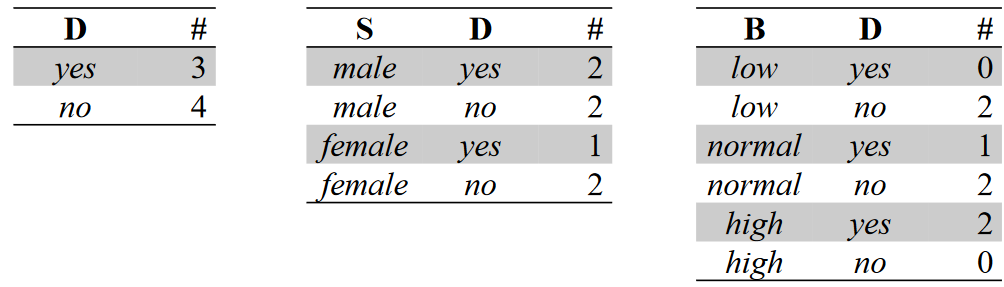

**Step 2: Initiaize the joint tables**

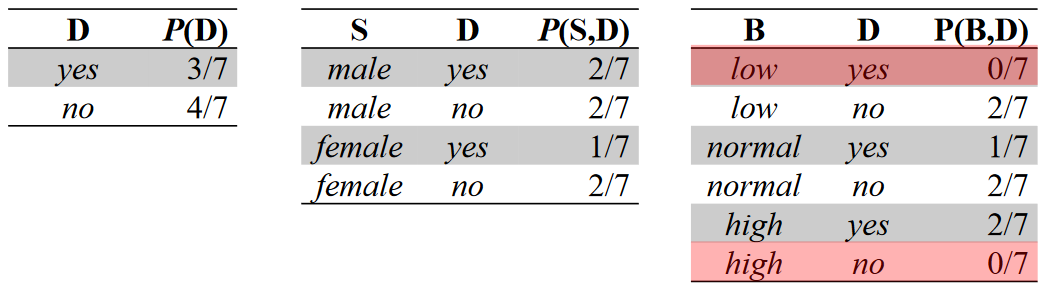

**Step 3: Calculate conditional probability**

| S      | D   | P(S\|D) |
|--------|-----|---------|
| male   | yes | 0.6667  |
| male   | no  | 0.5     |
| female | yes | 0.3333  |
| female | no  | 0.5     |


| B      | D   | P(B\|D) |
|--------|-----|---------|
| low    | yes | 0       |
| low    | no  | 0.5     |
| normal | yes | 0.3333  |
| normal | no  | 0.5     |
| high   | yes | 0.6667  |
| high   | no  | 0       |


**Step 3.1: Apply laplace smoothing**

$$P(x_1 = t|y = y_j;\alpha) = \frac{count(t, y_j) + \alpha}{A \alpha + \sum_{x_j, j∈{1,2,...m}} count(x_j, y_j)}$$

for $\alpha$ is smoothing parameter and $A$ is number of different value that $x_1$ can take

| B      | D   | P(B\|D) |
|--------|-----|---------|
| low    | yes | 0.0303  |
| low    | no  | 0.4884  |
| normal | yes | 0.3333  |
| normal | no  | 0.4884  |
| high   | yes | 0.6364  |
| high   | no  | 0.0232  |

**Example**

Given a patient is male and has high blood pressure, what is the conclusion for his diabetes.

**MLE inference**

$$Log P(male|yes) + log P(high|yes) = log(0.6667) + log(0.6364) = -0.8573$$

$$Log P(male|no) + log P(high |no) = log(0.5) + log(0.0232) = -4.4567$$

## Coding

In [36]:
import itertools

import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Categorical naive bayes

In [37]:
data = [
    ['normal', 'male', 'no'],
    ['low', 'female', 'no'],
    ['high', 'male', 'yes'],
    ['normal', 'female', 'yes'],
    ['normal', 'male', 'no'],
    ['low', 'female', 'no'],
    ['high', 'male', 'yes']
    ]

df = pd.DataFrame(data,columns = ['B', 'S', 'D'])

le = LabelEncoder()
decoder = {}

y = df['D']
y = [1 if diag == 'yes' else 0 for diag in y]

x = df.drop(columns = ['D'])

for col in x.columns:
    x[col] = le.fit_transform(x[col])
    decoder[col] = list(le.classes_)

In [38]:
nb = CategoricalNB(alpha = 0.1)
nb.fit(x, y)

CategoricalNB(alpha=0.1)

In [39]:
nb.predict_proba([[2,1]])

array([[0.59813084, 0.40186916]])

In [40]:
def posterior_without_evident(x, prior = True):
    y_pred = np.zeros(len(nb.classes_))
    for i, feature in enumerate(nb.feature_log_prob_):
        for y_class, likelihood in enumerate(feature):
            y_pred[y_class] += likelihood[x[i]]
    if prior:
        for y_class, prior in enumerate(nb.class_log_prior_):
            y_pred[y_class] += prior
    return np.exp(y_pred)

In [41]:
nb.predict_proba([[2,1]])[0]/posterior_without_evident([2,1])

array([4.28660436, 4.28660436])

### Gaussian naive bayes

In [7]:
# modified from https://www.kaggle.com/code/nisasoylu/naive-bayes-implementation-on-cancer-dataset/notebook
!wget https://raw.githubusercontent.com/44REAM/CEB-machine-learning/main/data.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
cancer_df = pd.read_csv('data.csv')
cancer_df = cancer_df.drop(columns = ['id', 'Unnamed: 32'])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [44]:
cancer_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [46]:
cancer_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

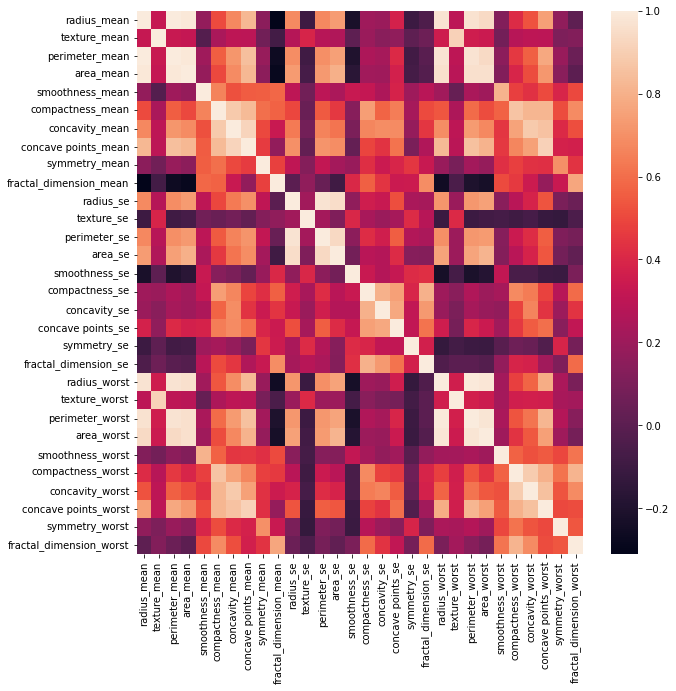

In [47]:
corr = cancer_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr)

In [50]:
B = cancer_df[cancer_df.diagnosis == "B"].drop(columns = ['diagnosis'])
M = cancer_df[cancer_df.diagnosis == "M"].drop(columns = ['diagnosis'])

feature_pairs = [(i, j) for (i, j) in itertools.product(B.columns, B.columns) if i!=j]


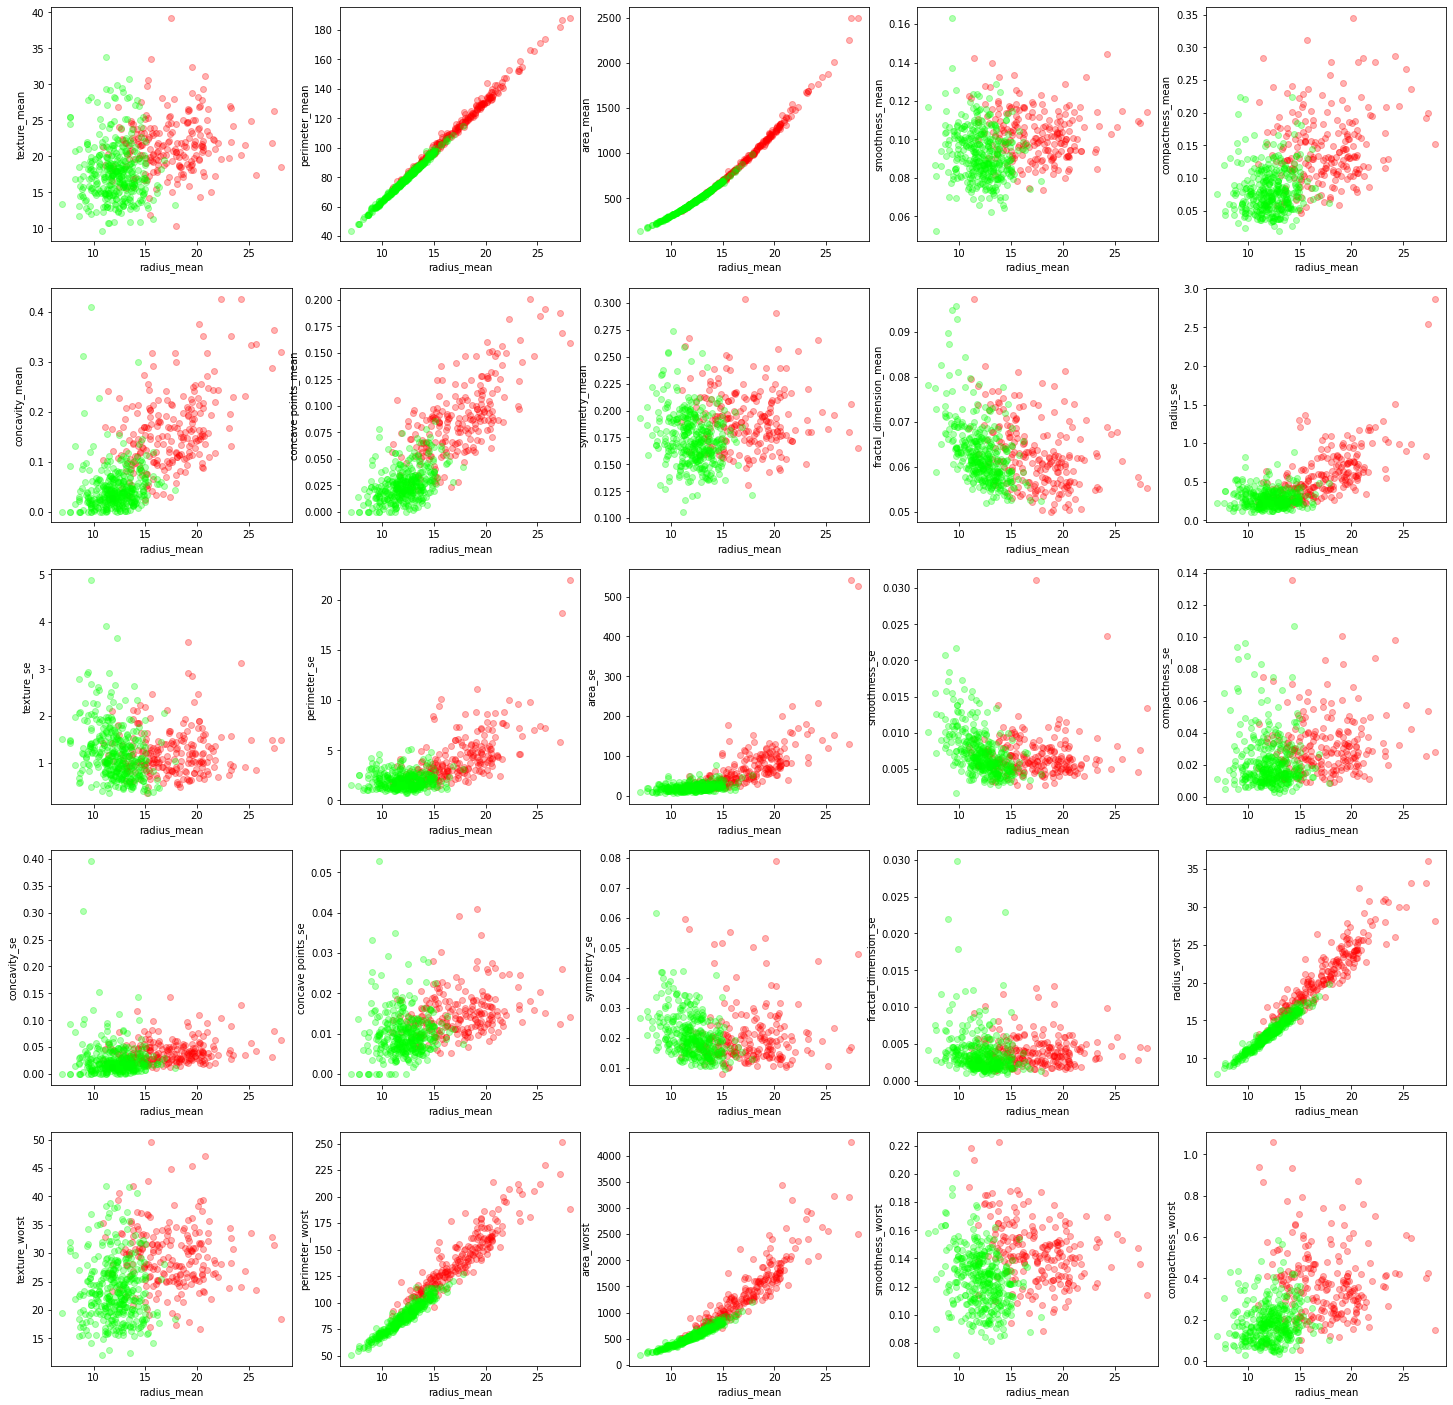

In [14]:
n_row = 5
n_col = 5
fig, axs = plt.subplots(n_row, n_col)

fig.set_size_inches((25,25))

n_feature = 0

for row in range(n_row):
    for col in range(n_col):
        (feature1, features2) = feature_pairs[n_feature]
        axs[row][col].scatter(M[feature1], M[features2], color = "red", label = "Malignant", alpha = 0.3)
        axs[row][col].scatter(B[feature1], B[features2], color = "lime", label = "Benign", alpha = 0.3)
        axs[row][col].set_xlabel(feature1)
        axs[row][col].set_ylabel(features2)
        n_feature+=1

In [56]:
y = cancer_df['diagnosis']
y = [1 if diag == 'M' else 0 for diag in y]

x = cancer_df.drop(columns = ['diagnosis'])# /cancer_df.drop(columns = ['diagnosis']).max(axis = 0)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
x_train, x_test = x_train.to_numpy(), x_test.to_numpy()

In [61]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [62]:
from sklearn.metrics import average_precision_score, classification_report
yhat = nb.predict(x_test)
print("Report: ", classification_report(y_test, yhat))

Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96       187
           1       0.93      0.91      0.92        98

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [63]:
yprob = nb.predict_proba(x_test)
yprob[-8:].round(2)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [20]:
print("Naive Bayes score: ", nb.score(x_test, y_test))

Naive Bayes score:  0.9438596491228071


## Practice

### Get MLE from Gaussian naive bayes section

In [53]:
# your code write a model to estimate y from previous data by maximize the likelihood function



### Mix distribution

In [155]:
n = 50
x1_feature = np.random.choice(3, n, p=[0.2, 0.1, 0.7])
x2_feature = np.random.randn(n )*1.5 + 6
y = np.zeros(n)
class0_features = np.array([x1_feature, x2_feature, y]).T

x1_feature = np.random.choice(3, n, p=[0.2, 0.5, 0.3])
x2_feature = np.random.randn(n )*3 + 2
y = np.ones(n)
class1_features = np.array([x1_feature, x2_feature, y]).T

data  = np.concatenate([class0_features, class1_features])

data = pd.DataFrame(data, columns = ['features1', 'features2', 'y'])

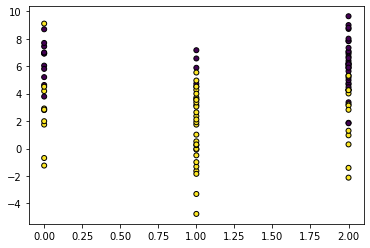

In [156]:
# your code write model to predict y from the data
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['features1', 'features2']].to_numpy()
y = data['y'].to_numpy()

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 25, edgecolor = 'k')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
np.random.seed(100)

In [157]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, classification_report


##################### Given Problem ###############################
n = 50
x1_feature = np.random.choice(3, n, p=[0.2, 0.1, 0.7])
x2_feature = np.random.randn(n )*1.5 + 6
y = np.zeros(n)
class0_features = np.array([x1_feature, x2_feature, y]).T

x1_feature = np.random.choice(3, n, p=[0.2, 0.5, 0.3])
x2_feature = np.random.randn(n )*3 + 2
y = np.ones(n)
class1_features = np.array([x1_feature, x2_feature, y]).T

data  = np.concatenate([class0_features, class1_features])

data = pd.DataFrame(data, columns = ['features1', 'features2', 'y'])
####################################################################


X = data[['features1', 'features2']].to_numpy()
y = data['y'].to_numpy()

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 25, edgecolor = 'k')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Get the mean and standard deviation of every row in dataset 
def mean_std(X_train, y_train):
    n = X_train.shape[1]
    mean = np.zeros((2, n))
    std = np.zeros((2, n))
    for label in [0, 1]:
        mean[label, :] = X_train[y_train==label].mean(axis=0)
        std[label, :]  = X_train[y_train==label].std(axis=0)
    return mean, std

# Get the mean and standard deviation of the training dataset 
mean, std = mean_std(X_train, y_train)

# Fitting the data with the Gaussian distribution function 
def gaussian_pdf(X, mean, std):
    left = 1 / (np.sqrt(2 * np.pi) * std)
    e = (X - mean) ** 2 / (2 * (std ** 2))
    right = np.exp(-e)
    return left*right

# Likelihood of every output y = 0 and y = 1
likelihood0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
likelihood1 = gaussian_pdf(X_test, mean[1, :], std[0, :])

total_likelihood0 = np.prod(likelihood0, axis = 1)
total_likelihood1 = np.prod(likelihood1, axis = 1)

m0 = len(X_train[y_train == 0])
m1 = len(X_train[y_train == 1])
prior0 = m0 / (m0 + m1)
prior1 = m1 / (m0 + m1)

posterior0 = prior0 * total_likelihood0    
posterior1 = prior1 * total_likelihood1
yhat = 1 * posterior1 > posterior0


print(average_precision_score(y_test, yhat))
print("Report: ", classification_report(y_test, yhat))

In [158]:
from sklearn.metrics import average_precision_score, classification_report
print(average_precision_score(y_test, yhat))
print("Report: ", classification_report(y_test, yhat))

0.85
Report:                precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



In [119]:
def posterior_without_evident(x, prior = True):
    y_pred = np.zeros(len(nb.classes_))
    for i, feature in enumerate(nb.feature_log_prob_):
        for y_class, likelihood in enumerate(feature):
            y_pred[y_class] += likelihood[x[i]]
    if prior:
        for y_class, prior in enumerate(nb.class_log_prior_):
            y_pred[y_class] += prior
    return np.exp(y_pred)

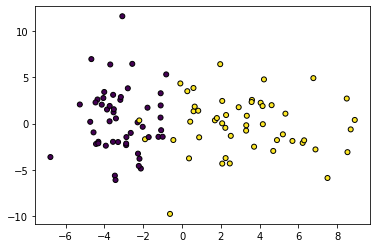

In [163]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 3, n_redundant = 0, n_informative = 2, 
                           n_clusters_per_class=1, scale = 3,
                           random_state = 42)
                           
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s = 25, edgecolor='k')

# Related Application of bayesian modeling

You guy usually want to know deep learning. Therefore, I include the application of bayesian for deep learning.

## Bayesian network


### Gaussian mixture model (Clustering)

We have $N$ data points let $x_i$ be datapoint $i$. We want to assign $x_i$ to the class ($K$ class in this case).

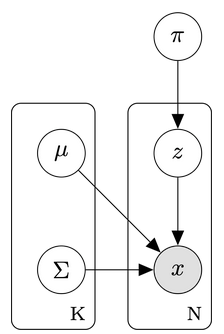

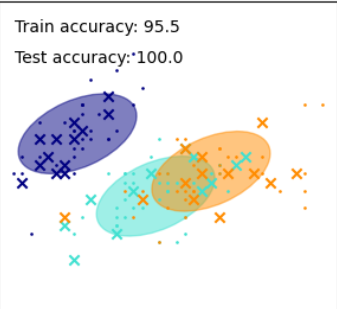


### Hidden markov model


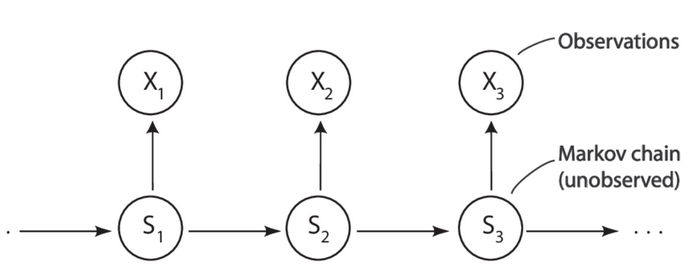

### Latent dirichlet allocation (Usually use in NLP)

## Deep Generative model



### Variational autoencoder

Similar to variational inference in bayesian network

![image.png](https://upload.wikimedia.org/wikipedia/commons/4/4a/VAE_Basic.png)

- $Z$ is a latent space random variable
- $X$ is input random variable
- $X'$ is decode random variable 

$$D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) ) = D_\text{KL}(q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z})) - \mathbb{E}_{\mathbf{z}\sim q_\phi(\mathbf{z}\vert\mathbf{x})}\log p_\theta(\mathbf{x}\vert\mathbf{z})$$

**Reading**
- https://www.eecs.tufts.edu/~mguama01/post/vae/
- https://lilianweng.github.io/posts/2018-08-12-vae/
- https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

### Diffusion model

- https://huggingface.co/blog/annotated-diffusion
- https://lilianweng.github.io/posts/2021-07-11-diffusion-models/